# Stage 09 — Homework Starter Notebook

In the lecture, we learned how to create engineered features. Now it’s your turn to apply those ideas to your own project data.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


np.random.seed(0)
n = 100
df = pd.DataFrame({
    'income': np.random.normal(60000, 15000, n).astype(int),
    'monthly_spend': np.random.normal(2000, 600, n).astype(int),
    'credit_score': np.random.normal(680, 50, n).astype(int)
})
df.head()

,income,monthly_spend,credit_score
0,86460,3129,661
1,66002,1191,668
2,74681,1237,734
3,93613,2581,712
4,88013,1296,712


## TODO: Implement at least 2 engineered features here

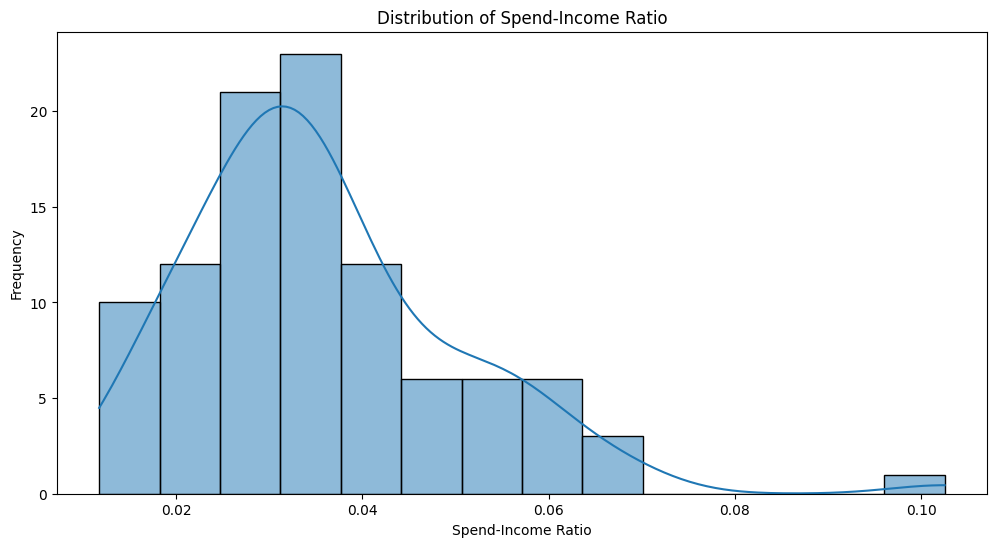

In [19]:
df['spend_income_ratio'] = df['monthly_spend'] / df['income']  # TODO: Your feature

df['spend_income_ratio']

plt.figure(figsize=(12, 6))
sns.histplot(df['spend_income_ratio'], kde=True)
plt.title('Distribution of Spend-Income Ratio')
plt.xlabel('Spend-Income Ratio')
plt.ylabel('Frequency')
plt.show()
# Add rationale in markdown below

### Rationale for Feature 1
Spend-income ratio is similar to the savings rate, gives another perspective on majorly the same idea, being how much of the income are the people spending.

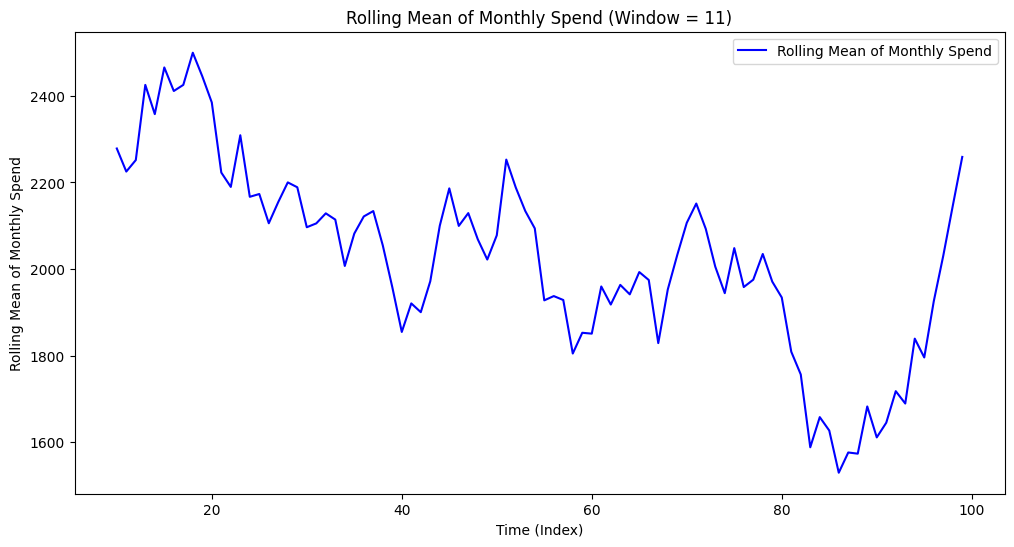

In [27]:
# TODO: Add another feature
df['rolling_spend_mean'] = df['monthly_spend'].rolling(11).mean()
df['rolling_spend_mean']

plt.figure(figsize=(12, 6))
plt.plot(df['rolling_spend_mean'], label='Rolling Mean of Monthly Spend', color='blue')
plt.title('Rolling Mean of Monthly Spend (Window = 11)')
plt.xlabel('Time (Index)')
plt.ylabel('Rolling Mean of Monthly Spend')
plt.legend()
plt.show()

### Rationale for Feature 2
This feature gives us an idea about the actual monthly spending as the time progresses. I increased the rolling window to 11, just to see a bigger general trend that we can see as the curve smoothens out a bit. The plot shows the rolling window mean is generally decreasing until after the 80th day where it recovers again approaching levels of 2400.

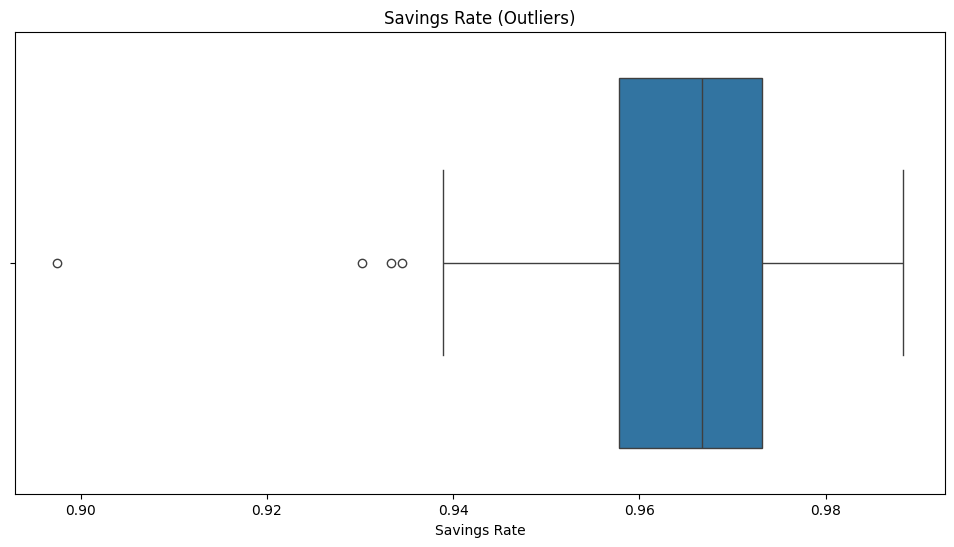

In [25]:
df['savings_rate']=(df['income']-df['monthly_spend'])/df['income']

# Boxplot for savings_rate
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['savings_rate'])
plt.title('Savings Rate (Outliers)')
plt.xlabel('Savings Rate')
plt.show()

### Rationale for Feature 3
Gives an idea about people's monthly saving rates on the basis of their income and spending, the boxplot gives us a median north of 0.96 (96% of the income is saved by the people), while the best is approaching 1.00 and the least is just below 0.90.

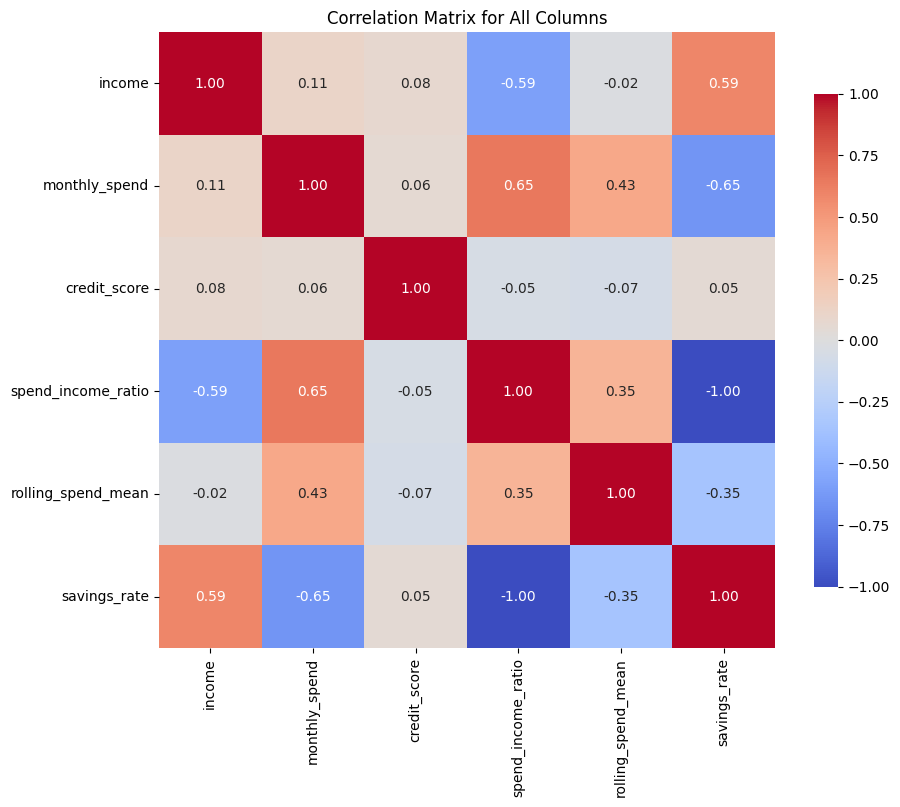

In [28]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix for All Columns')
plt.show()